In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("weight-height.csv")

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
# Here I want to drop Gender column because I am goen a perform simple linear regression
df.drop(columns=["Gender"],inplace=True)

In [6]:
df.head() 

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [7]:
X = df[["Height"]]

In [8]:
X.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [10]:
y = df['Weight']

In [12]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

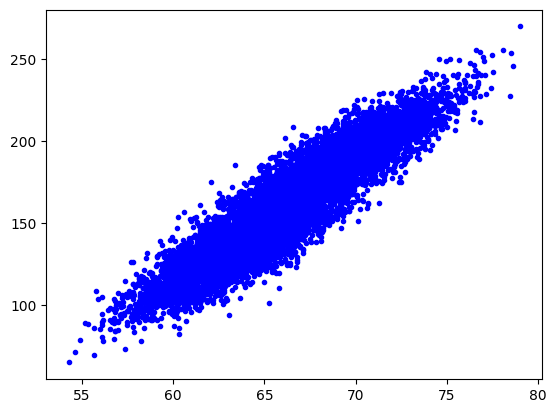

In [14]:
plt.plot(X,y,'b.') # By seeing the graph we can make conclusion that we can perform linear regression

In [15]:
# train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [16]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()

In [17]:
# train model 
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred = lr.predict(X_test)

In [19]:
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,y_pred))

r2 score :  0.8562263885800674


In [20]:
print("Coefficient : ",lr.coef_)

Coefficient :  [7.71486188]


In [21]:
print("Intercept : ",lr.intercept_)

Intercept :  -350.58194789631284


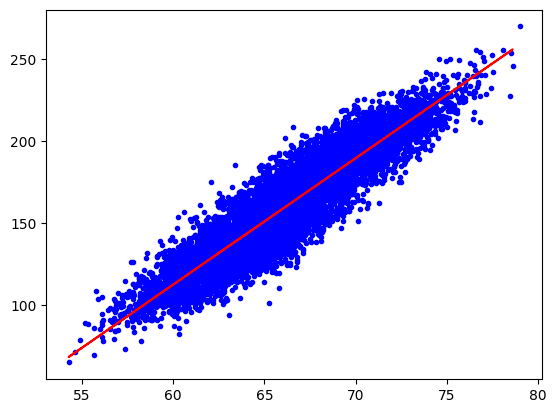

In [32]:
# plot best fit line 
plt.plot(X,y,'b.')
plt.plot(X_train,lr.predict(X_train),color="red")

### Maths implementation 

In [45]:
class lrMaths:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)
    
    def predict(self,X_test): 
        return self.m * X_test + self.b 

In [50]:
X = df.iloc[:,0].values

In [51]:
X

array([73.84701702, 68.78190405, 74.11010539, ..., 63.86799221,
       69.03424313, 61.94424588])

In [52]:
y = df.iloc[:,1].values

In [53]:
y

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [55]:
lrMaths = linearRegressionModel()

In [56]:
lrMaths.fit(X_train,y_train)

In [57]:
lrMaths.coef

np.float64(7.714861884731859)

In [58]:
lrMaths.intercept_

np.float64(-350.5819478963103)